In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_DATA_FILES/Regression ( Car Prices Prediction )/CarPrices.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

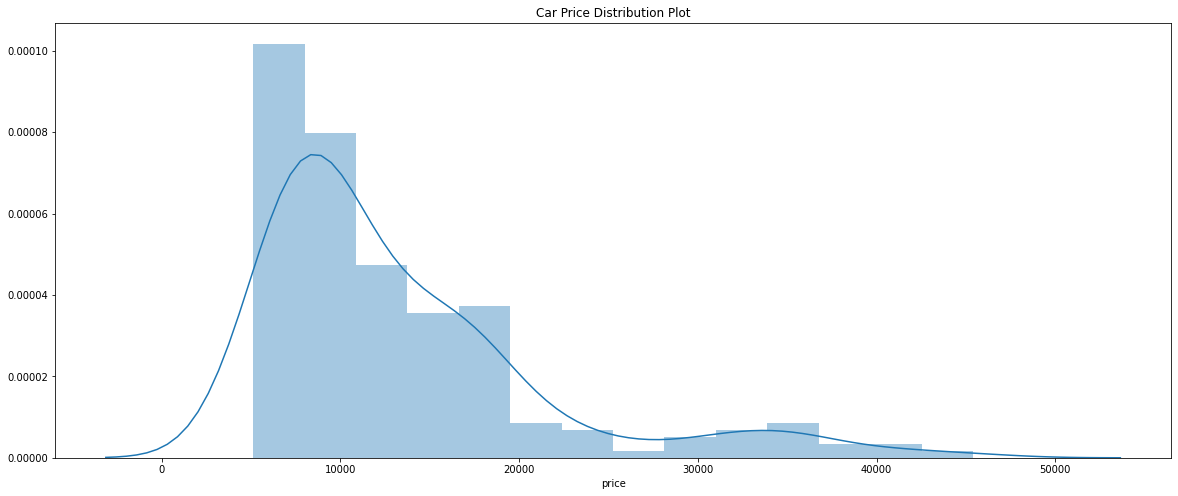

In [5]:
plt.figure(figsize=(20,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df.price)
plt.show()

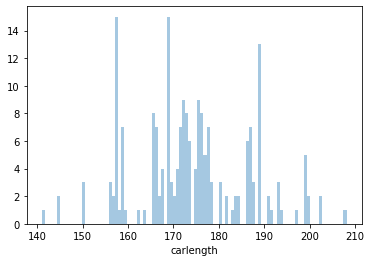

In [6]:
fig = sns.distplot(df['carlength'], bins = 100, kde = False)

## Comparison B/W different variables

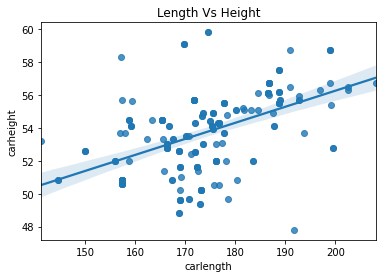

In [7]:
fig = sns.regplot(x = 'carlength', y = 'carheight', data =df)
plt.title("Length Vs Height")
plt.show()

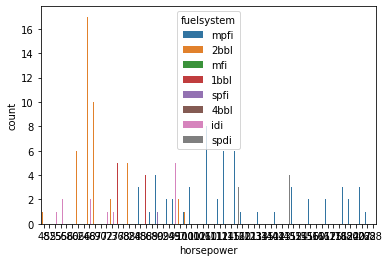

In [8]:
sns.countplot("horsepower",hue = "fuelsystem", data=df)

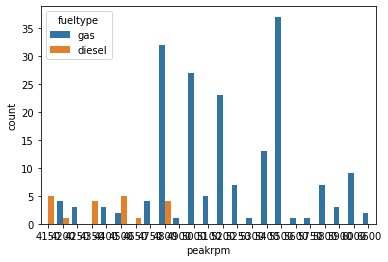

In [9]:
sns.countplot("peakrpm",hue = "fueltype", data=df)

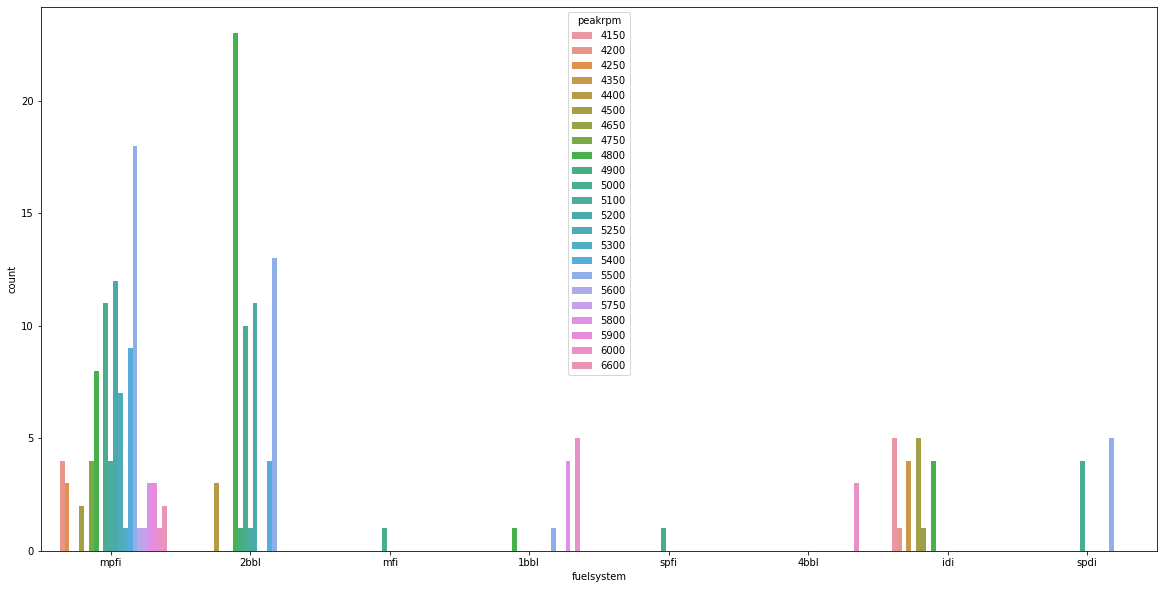

In [10]:
plt.figure(figsize = (20,10))
sns.countplot("fuelsystem",hue = "peakrpm", data=df)

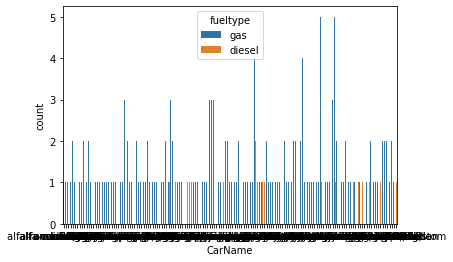

In [11]:
sns.countplot("CarName",hue = "fueltype", data=df)

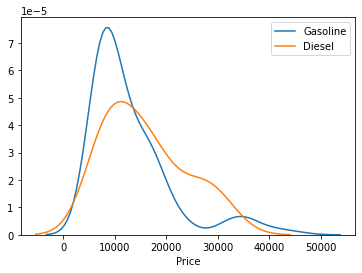

In [12]:
sns.kdeplot(df.price[df.fueltype == "gas"])
sns.kdeplot(df.price[df.fueltype == "diesel"])
plt.legend(["Gasoline", "Diesel"])
plt.xlabel("Price")
plt.show()

In [13]:
df.drop(['CarName', 'fuelsystem', 'car_ID', 'symboling'], axis = 1, inplace = True)

In [14]:
Fuel = df['fueltype'].unique()
Fuel

array(['gas', 'diesel'], dtype=object)

In [15]:
Cylinder = df['cylindernumber'].unique()
Cylinder

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [16]:
Engine_Type = df['enginetype'].unique()
Engine_Type

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [17]:
Engine_Loc = df['enginelocation'].unique()
Engine_Loc

array(['front', 'rear'], dtype=object)

In [18]:
Wheeling = df['drivewheel'].unique()
Wheeling

array(['rwd', 'fwd', '4wd'], dtype=object)

In [19]:
Doors = df['doornumber'].unique()
Doors

array(['two', 'four'], dtype=object)

In [20]:
from word2number import w2n

In [21]:
df['cylindernumber'] = df.cylindernumber.apply(w2n.word_to_num)
df['doornumber'] = df.doornumber.apply(w2n.word_to_num)

In [22]:
df['fueltype'] = pd.get_dummies(df['fueltype'])
df['enginetype'] = pd.get_dummies(df['enginetype'])
df['enginelocation'] = pd.get_dummies(df['enginelocation'])
df['drivewheel'] = pd.get_dummies(df['drivewheel'])
df['aspiration'] = pd.get_dummies(df['aspiration'])
df['carbody'] = pd.get_dummies(df['carbody'])

In [23]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,2,1,0,1,88.6,168.8,64.1,48.8,...,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,1,2,1,0,1,88.6,168.8,64.1,48.8,...,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,1,2,0,0,1,94.5,171.2,65.5,52.4,...,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,1,4,0,0,1,99.8,176.6,66.2,54.3,...,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,1,4,0,1,1,99.4,176.6,66.4,54.3,...,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
df.dtypes

fueltype              uint8
aspiration            uint8
doornumber            int64
carbody               uint8
drivewheel            uint8
enginelocation        uint8
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            uint8
cylindernumber        int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [25]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/3, random_state = 0)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn import metrics

# Regression

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
prediction = lr.predict(x_test)

In [32]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 72.12 %


In [33]:
r2_score(y_test,prediction)

0.7211718551822619

## Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
prediction = regressor.predict(x_test)

In [37]:
score = round((regressor.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 90.43 %


In [38]:
r2_score(y_test,prediction)

0.9043056429352928

## Support Vector Regression

In [39]:
from sklearn.svm import SVR

In [40]:
regression = SVR(kernel='rbf')
regression.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
prediction = regression.predict(x_test)

In [42]:
score = round((regression.score(x_test, y_test)*100),2)
print("\nModel Score:", score,"%")


Model Score: -10.73 %


In [43]:
r2_score(y_test,prediction)

-0.1072874238820758

## Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
prediction = reg.predict(x_test)

In [47]:
score = round((reg.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 87.93 %


In [48]:
r2_score(y_test,prediction)

0.8793075792522379

#### Random forest regression got the highest percentage of the success ratio.

### Checking which is the major factor in the price of car.

In [49]:
classifier = RandomForestRegressor()
classifier.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [50]:
feature_names = x.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = x.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

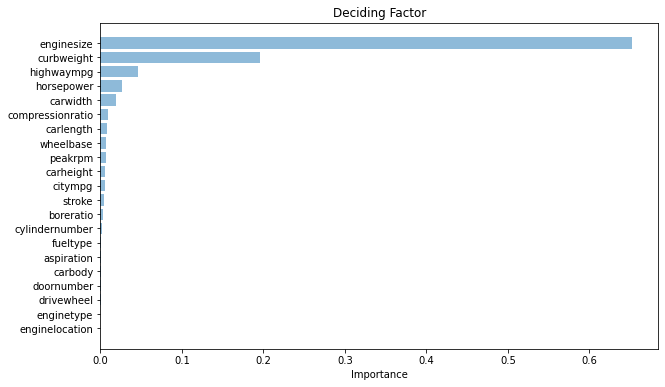

In [51]:
plt.figure(figsize = (10,6))
plt.barh([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Deciding Factor')
plt.show()

### Engine Size(cc) played a key role in the price deciding factor.